In [48]:
import pandas as pd 
thera_df = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')

In [49]:
thera_df.shape

(5000, 14)

# Study the data distribution in each attribute, share your findings

In [50]:
thera_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [51]:
thera_df = thera_df.drop(labels = ["ID","ZIP Code"], axis = 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2b8ace80>,
      dtype=object)

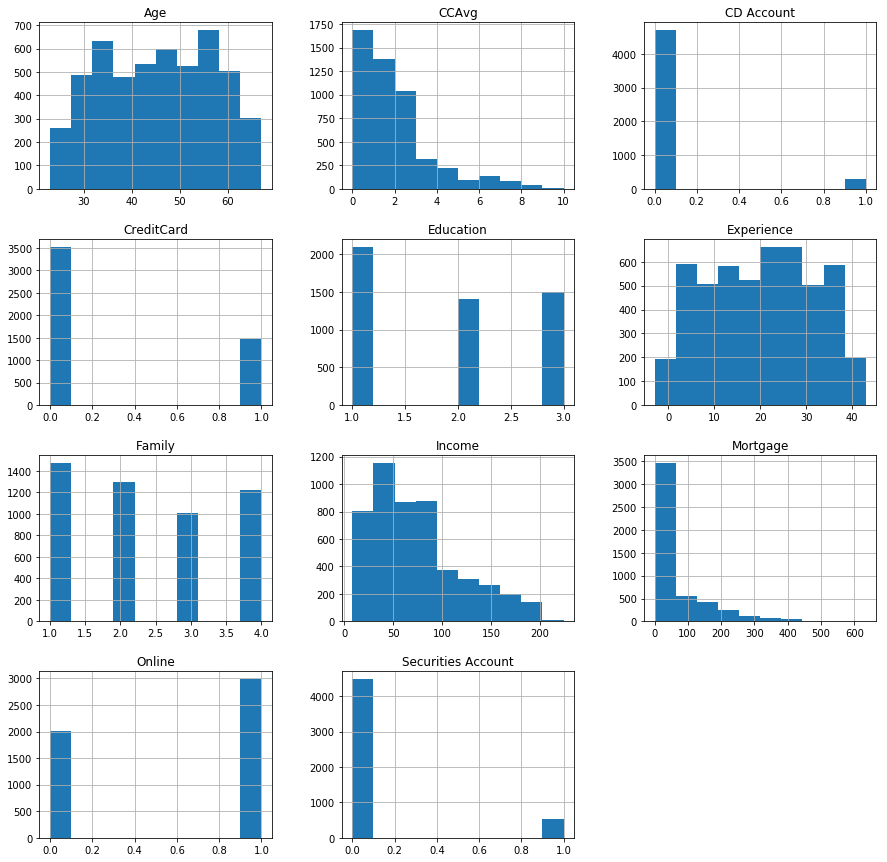

In [52]:
thera_df.hist(figsize=(15,15),column=['Age','CCAvg','Experience','Income','Family','Education','Mortgage','Securities Account','CD Account','Online', 'CreditCard'])

In [53]:
thera_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


In [54]:
thera_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(11)
memory usage: 468.8 KB


In [55]:
thera_df.var()

Age                     131.404166
Experience              131.513962
Income                 2119.104235
Family                    1.317130
CCAvg                     3.054312
Education                 0.705380
Mortgage              10345.697538
Personal Loan             0.086801
Securities Account        0.093519
CD Account                0.056763
Online                    0.240678
CreditCard                0.207606
dtype: float64

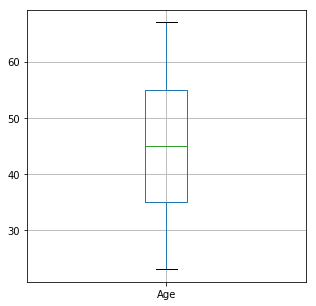

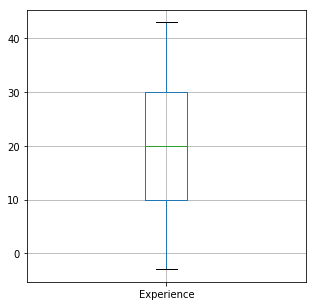

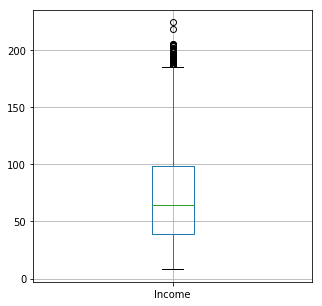

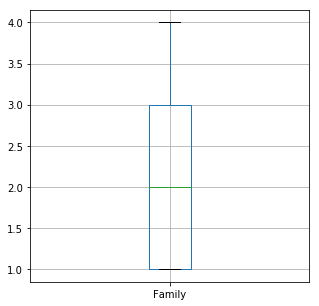

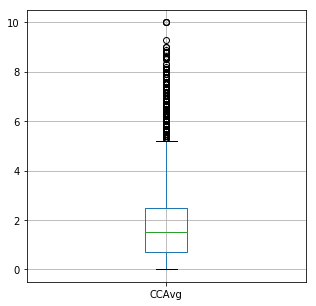

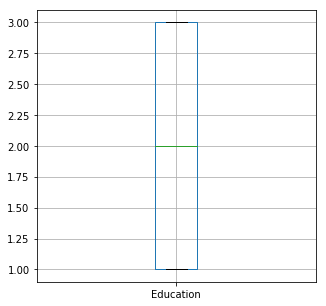

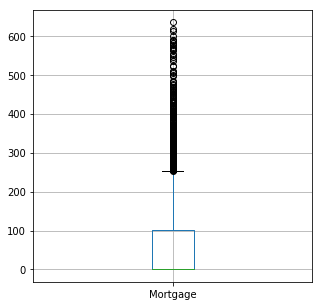

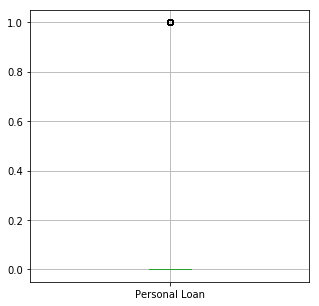

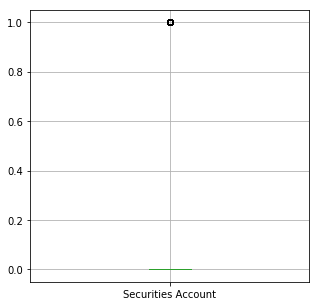

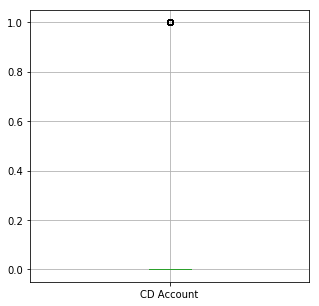

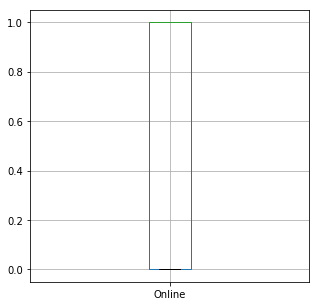

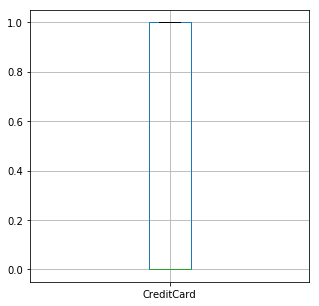

In [56]:
import matplotlib.pyplot as plt
for column in thera_df:
    plt.figure(figsize=(5,5))
    thera_df.boxplot([column])

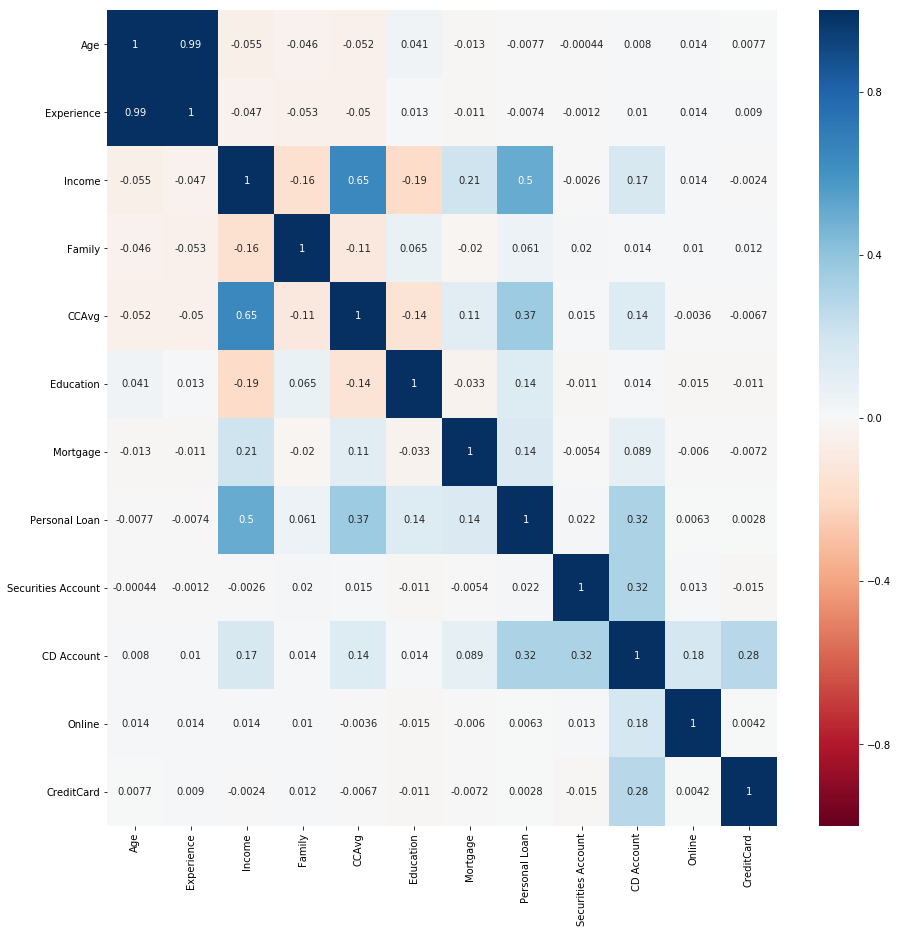

In [57]:
plt.figure(figsize=(15,15))
import seaborn as sn
sn.heatmap(thera_df.corr(), vmin=-1, vmax=1, cmap="RdBu",annot=True)

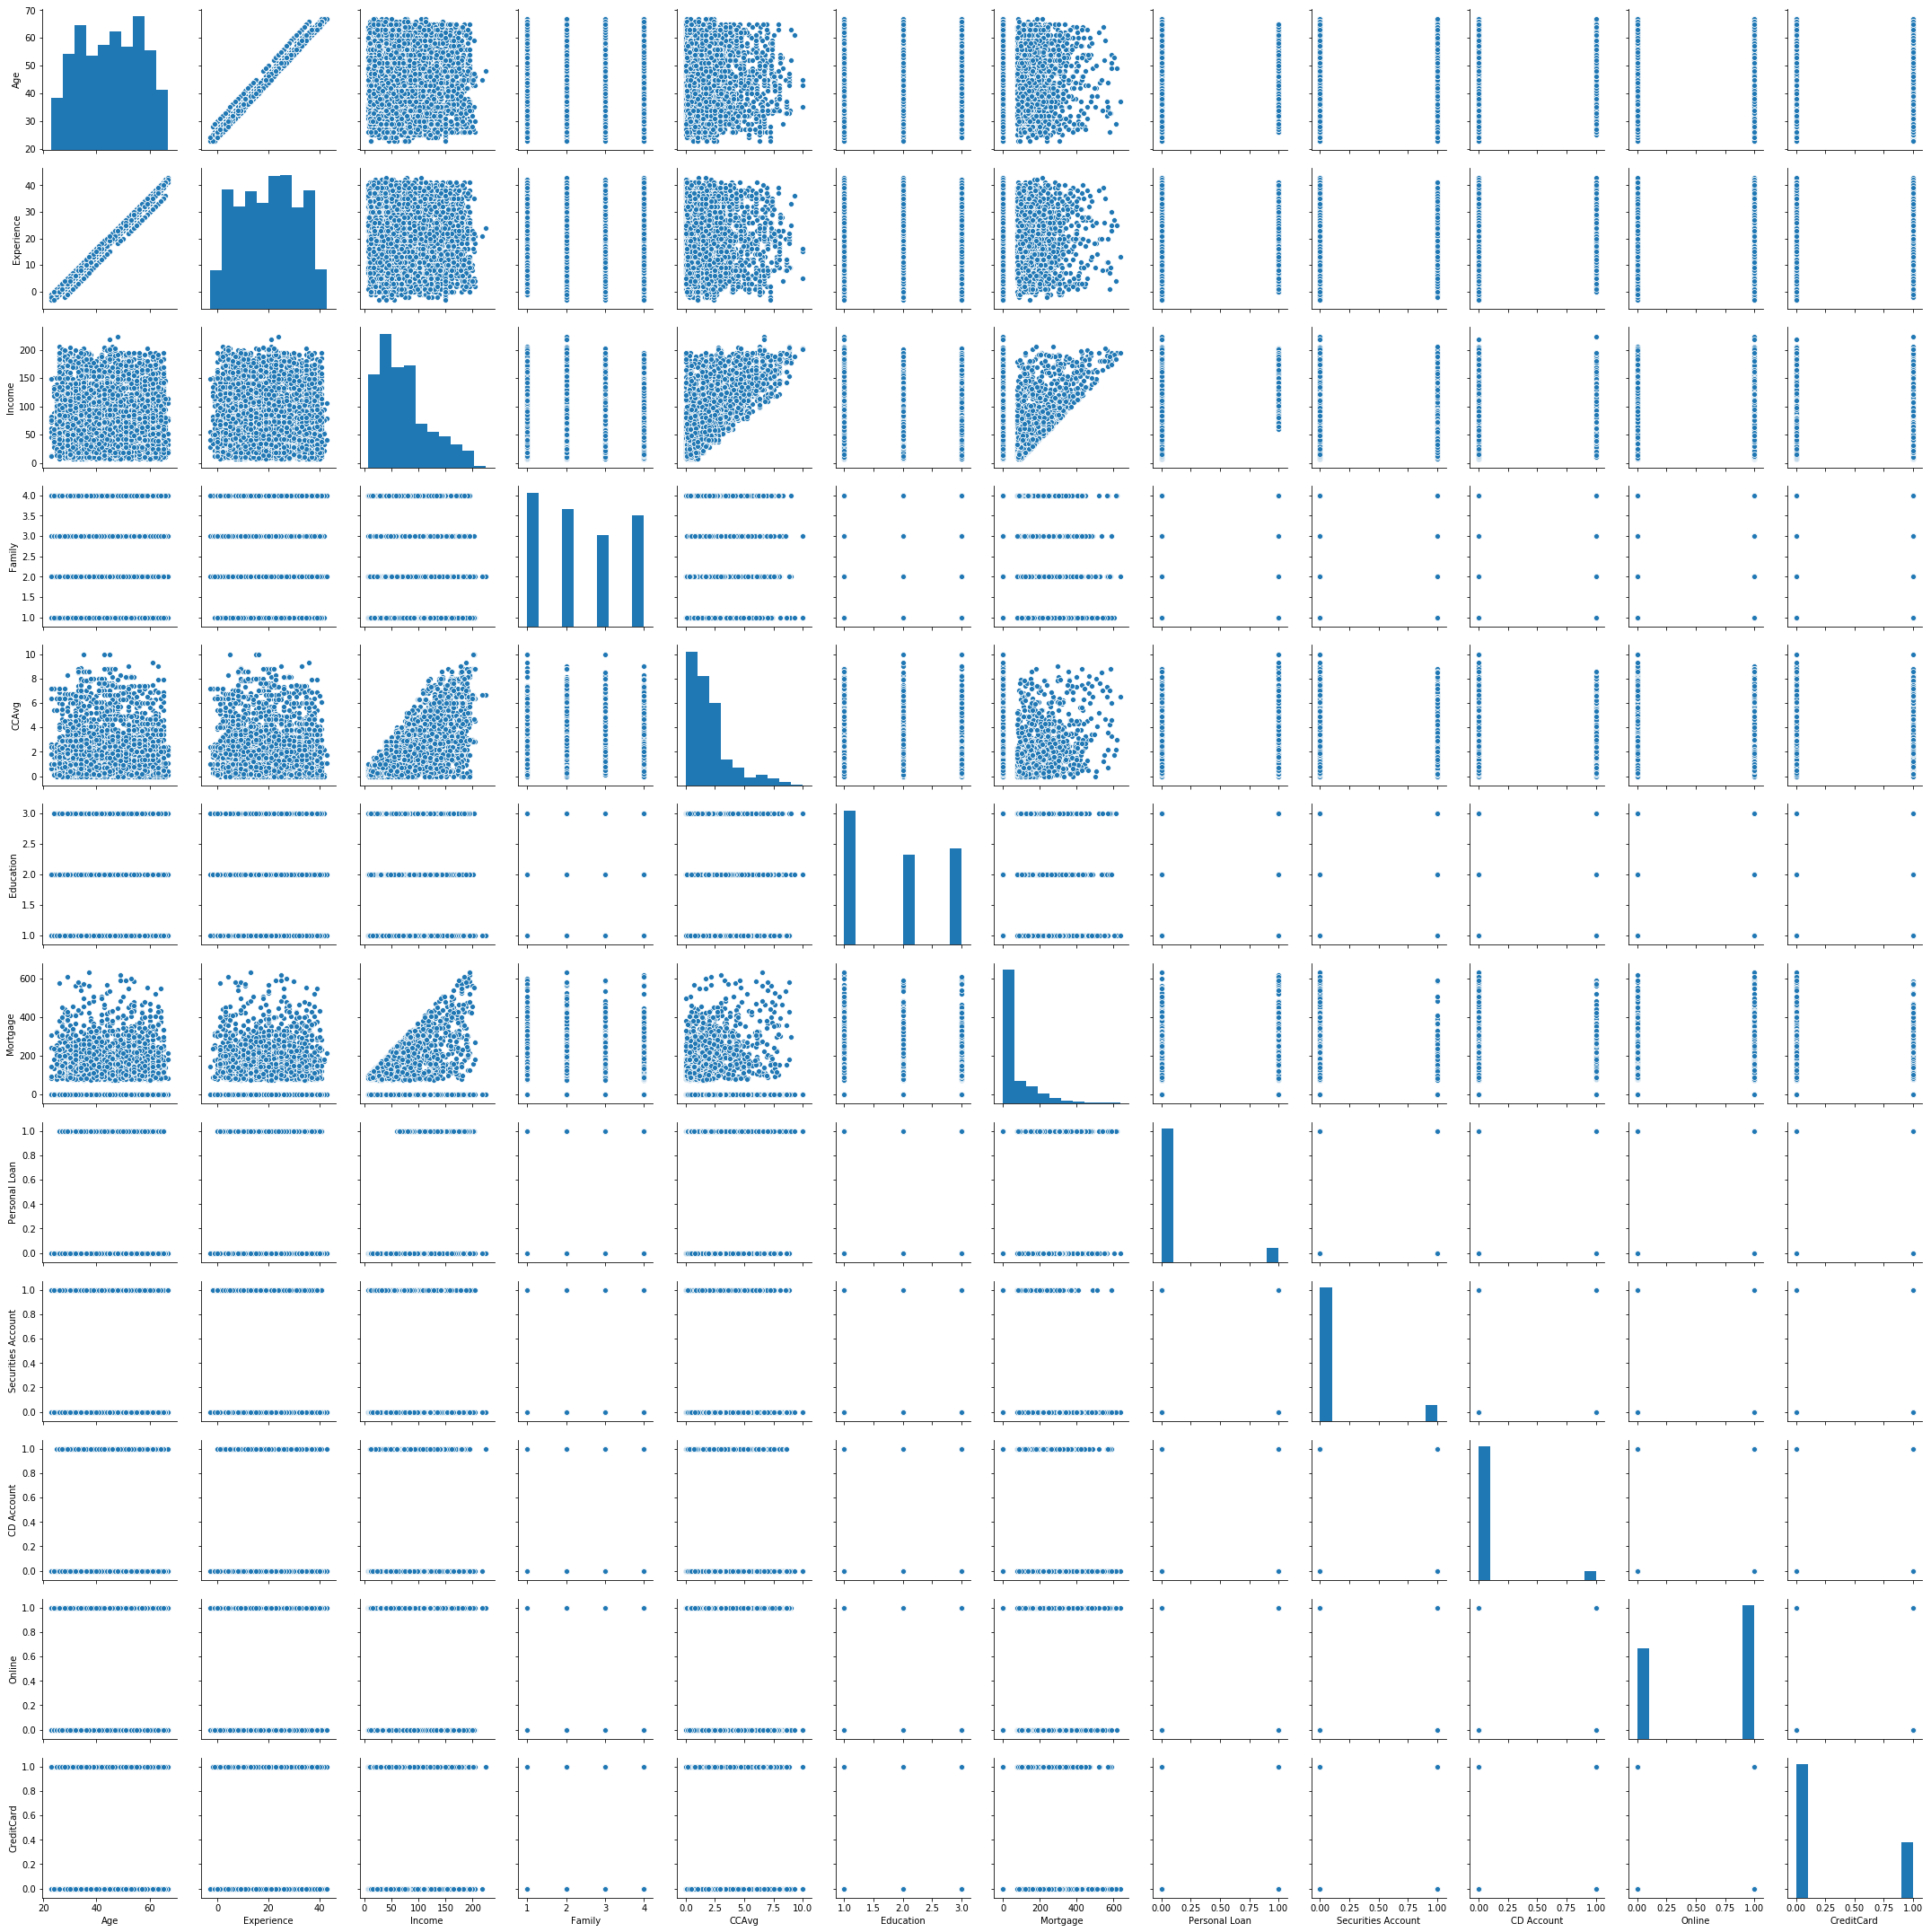

In [58]:
sn.pairplot(thera_df)

#### Findings:

 1. All the columns are attributes to consider in the modelling except Id,Zipcode columns
 2. All attributes contains no missing value
 3. The CCAvg, Income and Mortgage have outliers, Since, each customer has different level of CCavg, income and mortgage, I think this is reasonable, so no need to remove them. 
 4. Credit card users are positively correlated to income and personal loan attributes.
 5. Personal loan and income attrbutes are positively correlated.
 6. Age and Experiance are higly correlated. 
 7. There are 52 rows of negative outlier in the Experiance column which are to be removed/replaced.
 8. Income and CCAvg are negatively correlated, similarly, Mortgage and income are negatively correlated.


In [59]:
 #there are some outliers in the columns, which will be removed using below capping methods, but 
    #these outliers are considered valid as it will change for each customers.
# Trying to remove outliers of experience as there are negative values.

numericColNames = ['Experience']#,'Income','Family','CCAvg','Education','Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard']

for colname in numericColNames:
    iqr = thera_df[colname].quantile(.75) - thera_df[colname].quantile(.25)
    minCap = thera_df[colname].quantile(.25) - (1.5 * iqr)
    maxCap = thera_df[colname].quantile(.75) + (1.5 * iqr)
    thera_df = thera_df[(thera_df[colname] >= minCap) & (thera_df[colname] <= maxCap)]


In [60]:
thera_df[thera_df['Experience'] < 0].shape

(52, 12)

In [68]:
thera_df.loc[thera_df['Experience'] < 0, 'Experience'] = 0 # replacing negative experience to 0

There are 52 rows of experience with negative value.

In [69]:
theraBank_df = thera_df[thera_df['Experience'] >= 0]

In [70]:
theraBank_df.shape

(5000, 12)

# Get the target column distribution. Your comments

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a31d0c7b8>]],
      dtype=object)

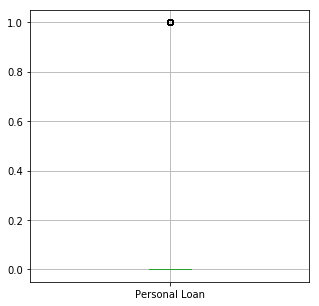

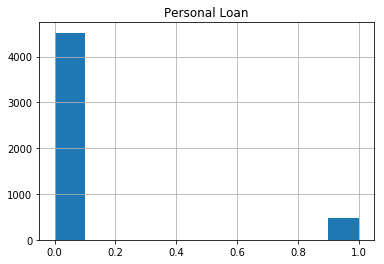

In [71]:
plt.figure(figsize=(5,5))
theraBank_df.boxplot(['Personal Loan'])
theraBank_df.hist(column='Personal Loan')

In [72]:
theraBank_df['Personal Loan'].var()

0.08680136027204756

In [73]:
thera_df.groupby(['Personal Loan']).count()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480


From the outputs, we can derive that Personal loan class distribution among 0 and 1 is 9:1, so model will better predict 0 than 1 

# Split the data into training and test set in the ratio of 70:30 respectively

In [74]:
import numpy as np
X = np.array(theraBank_df.drop(labels= "Personal Loan" , axis = 1))
X

array([[25.,  1., 49., ...,  0.,  0.,  0.],
       [45., 19., 34., ...,  0.,  0.,  0.],
       [39., 15., 11., ...,  0.,  0.,  0.],
       ...,
       [63., 39., 24., ...,  0.,  0.,  0.],
       [65., 40., 49., ...,  0.,  1.,  0.],
       [28.,  4., 83., ...,  0.,  1.,  1.]])

In [75]:
Y = np.array(theraBank_df['Personal Loan'])
Y

array([0, 0, 0, ..., 0, 0, 0])

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.30, random_state=98789)

# Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans.

In [77]:
# Logistic model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.30, random_state=98789)
logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)
logistic_y_predict = logistic_model.predict(X_test)
logistic_model_trainscore = logistic_model.score(X_train, Y_train)
logistic_model_score = logistic_model.score(X_test, Y_test)
print('Accuracy on train data set is {0}'.format(logistic_model_trainscore))
print('Accuracy on test data set id {0}'.format(logistic_model_score))
print(metrics.confusion_matrix(Y_test, logistic_y_predict))

Accuracy on train data set is 0.9491428571428572
Accuracy on test data set id 0.95
[[1336   15]
 [  60   89]]


/Users/malarvizhi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [87]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.30, random_state=123456)

X_train_scaled = zscore(X_train) 
X_test_scaled = zscore(X_test)
#from sklearn.model_selection import GridSearchCV
#KNeighborsClassifier
#parameters = {'n_neighbors':[5,7,9],   
#              'metric': ('minkowski', 'euclidean')}
#knn = KNeighborsClassifier()
#gscv = GridSearchCV(knn, parameters, cv=10)
#gscv.fit(X_train_scaled, Y_train)

knnModel = KNeighborsClassifier(n_neighbors= 9, metric='euclidean')
knnModel.fit(X_train_scaled, Y_train)
knnModel_y_predict = knnModel.predict(X_test_scaled)
knnModel_model_trainscore = knnModel.score(X_train_scaled, Y_train)
knnModel_model_score = knnModel.score(X_test_scaled, Y_test)
print('KNN Accuracy on train data set is {0}'.format(knnModel_model_trainscore))
print('KNN Accuracy on test data set is {0}'.format(knnModel_model_score))
print(metrics.confusion_matrix(Y_test, knnModel_y_predict))

KNN Accuracy on train data set is 0.9565714285714285
KNN Accuracy on test data set is 0.9573333333333334
[[1357    2]
 [  62   79]]


In [89]:
#gscv.best_params_

In [90]:

#gscv.best_score_

In [91]:

# Naive Model
from sklearn.naive_bayes import GaussianNB
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.30, random_state=98789
                                                )

naiveBayesModel = GaussianNB()
naiveBayesModel.fit(X_train, Y_train)

naiveBayesModel_y_predict = naiveBayesModel.predict(X_test)
naiveBayesModel_trainscore = naiveBayesModel.score(X_train, Y_train)
naiveBayesModel_score = naiveBayesModel.score(X_test, Y_test)
print('Naive bayes Accuracy on train data set is {0}'.format(naiveBayesModel_trainscore))
print('Naive bayes Accuracy on test data set is {0}'.format(naiveBayesModel_score))
print(metrics.confusion_matrix(Y_test, naiveBayesModel_y_predict))


Naive bayes Accuracy on train data set is 0.8808571428571429
Naive bayes Accuracy on test data set is 0.9006666666666666
[[1260   91]
 [  58   91]]


# Print the confusion matrix for all the above models


In [92]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.30, random_state=98789)
print('Confusion matrix for Logistic model:')
print(metrics.confusion_matrix(Y_test, logistic_y_predict))
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.30, random_state=123456)
print('Confusion matrix for KNN model:')
print(metrics.confusion_matrix(Y_test, knnModel_y_predict))
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.30, random_state=98789)
print('Confusion matrix for Naive bayes model:')
print(metrics.confusion_matrix(Y_test, naiveBayesModel_y_predict))

Confusion matrix for Logistic model:
[[1336   15]
 [  60   89]]
Confusion matrix for KNN model:
[[1357    2]
 [  62   79]]
Confusion matrix for Naive bayes model:
[[1260   91]
 [  58   91]]


# Give your reasoning on which is the best model in this case and why it performs better? 

Comparing above models, KNN model provides better accuracy 96% and minimum errors. 
This is because KNN model is much straight forward and stable model, which works fine when there is sparcity in the data ie. lots of 0's and fewer 1's. Cosine similarity correlation is used when there is sparcity in the data.

When type II error is costly, I would choose Logistic model since this model also gives 95% of accuracy with minimum of Type II error. In this case, Type I error is costly, ie. personal loan customers are identified as non-loaners which is very costly.KNN model has minimal Type I error, so, KNN model will do good. 